### 原子操作

#### 1.1概念
原子操作提供了指令原子执行，中间没有中断。就像原子被认为是不可分割颗粒一样，原子操作（atomic operation）是不可分割的操作。

#### 示例
假如现在要对无符号整形变量 a 赋值，值为 3，对于 C 语言来讲很简单，直接就是：

In [4]:
a = 3

但是 C 语言要先编译为成汇编指令， ARM 架构不支持直接对寄存器进行读写操作，比如要借助寄存器 R0、 R1 等来完成赋值操作。假设变量 a 的地址为 0X3000000，“a=3”这一行 C语言可能会被编译为如下所示的汇编代码：

In [ ]:
ldr r0, =0X30000000 		/* 变量 a 地址 */
ldr r1, = 3 				/* 要写入的值 */
str r1, [r0] 				/* 将 3 写入到 a 变量中 */

从上述代码可以看出， C 语言里面简简单单的一句“a=3”，编译成汇编文件以后变成了3句，那么程序在执行的时候肯定是按照示例代码中的汇编语句一条一条的执行。假设现在线程 A要向 a 变量写入 3 这个值，而线程 B 也要向 a 变量写入 30 这个值，我们理想中的执行顺序如下图所示：

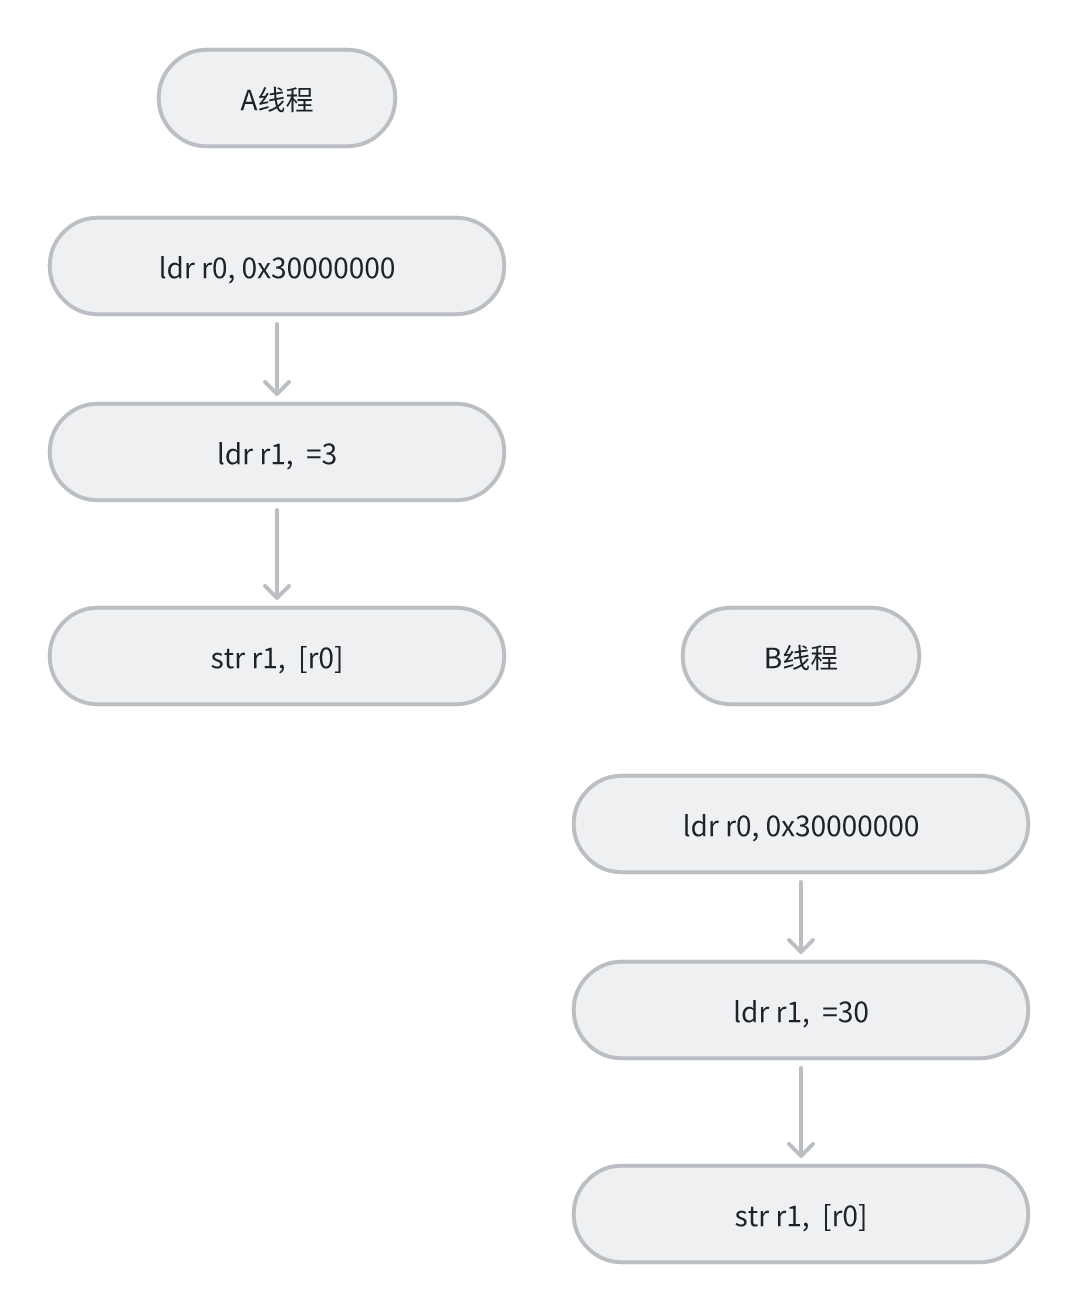

理想情况如上图所示，A线程先给a赋值给30，B线程再给a赋值为30.
但是它一共是六条语句，实际执行时可能是如下情况：

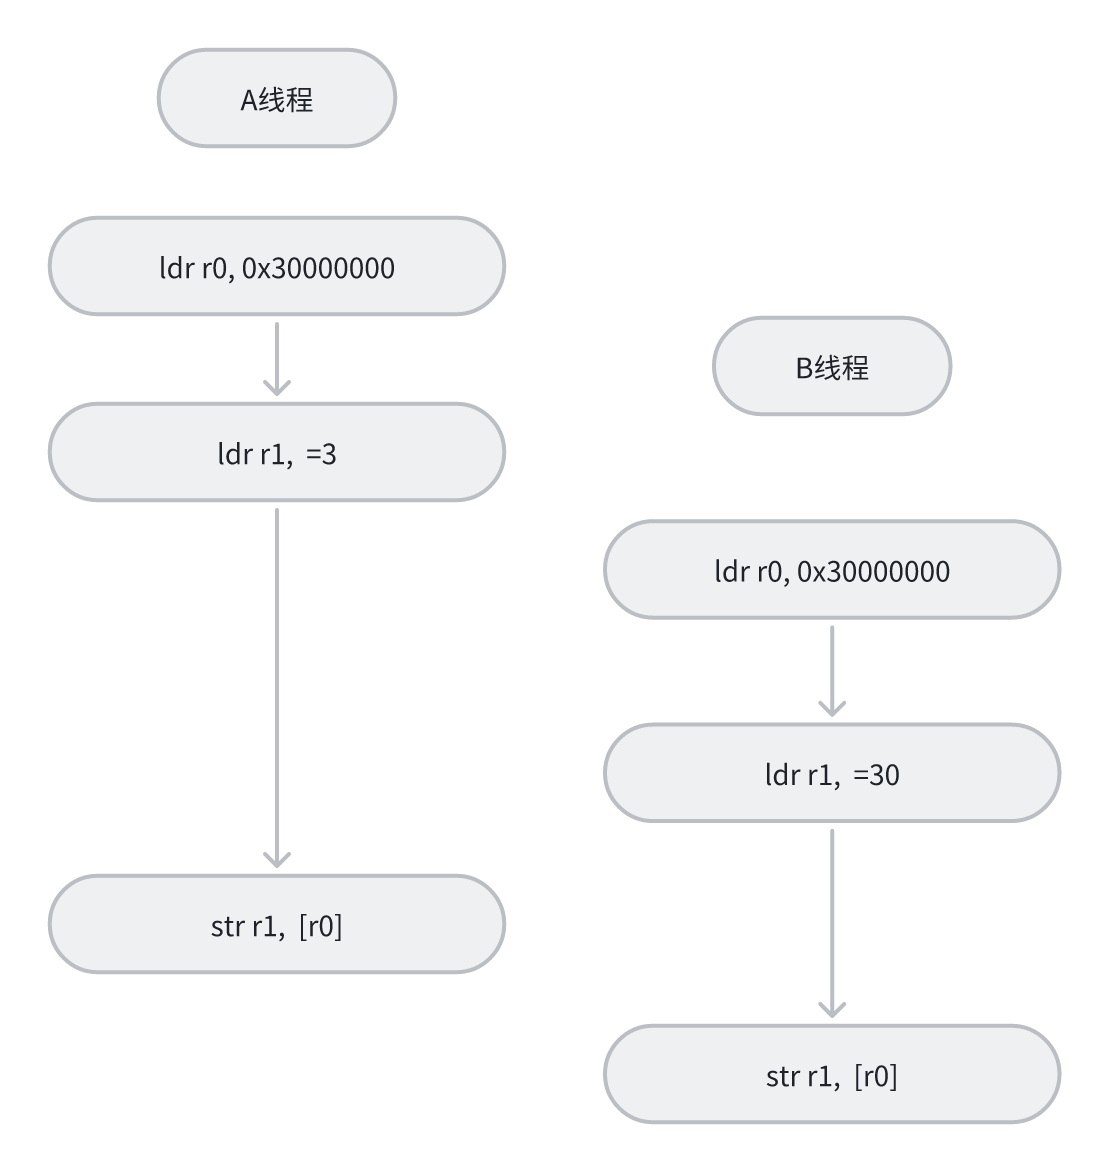

线程 A 最终将变量 a 设置为了 30，而并不是要求的 3！线程B 没有问题。这就是一个最简单的设置变量值的并发与竞争的例子，要解决这个问题就要保证示例代码 中的三行汇编指令作为一个整体运行，也就是作为一个原子存在。 Linux 内核提供了一组原子操作 API 函数来完成此功能， Linux 内核提供了两组原子操作 API 函数，一组是对整形变量进行操作的，一组是对位进行操作的，我们接下来看一下这些 API 函数。

### 1.3、原子操作结构体介绍
Linux 内核定义了叫做 atomic_t 的结构体来完成整形数据的原子操作，在使用中用原子变量来代替整形变量，此结构体定义在 include/linux/types.h 文件中，定义如下：

In [ ]:
/*32位系统下*/
typedef struct {
	int counter;
} atomic_t;


/*64位系统下*/
#ifdef CONFIG_64BIT
typedef struct {
	long counter;
} atomic64_t;
#endif

### 1.4原子操作的使用
#### 1,4,1 定义

In [ ]:
atomic_t a; #定义 a

#### 1.4.2、初始化

可以通过宏 ATOMIC\_INIT 向原子变量赋初值。

In [ ]:
atomic_t a = ATOMIC_INIT(0); #定义原子变量 a 并赋初值为 0

### 1.5、原子操作 API 函数

对原子变量进行操作，比如读、写、增加、减少等等， Linux 内核提供了大量的原子操作 API 函数，如下表 所示：
| 操作类型                 | 函数                                      | 描述                                                     |
|--------------------------|-------------------------------------------|----------------------------------------------------------|
| **初始化和类型**         | `atomic_int a = ATOMIC_VAR_INIT(0);`      | 初始化一个原子变量                                       |
| **加载和存储**           | `atomic_store(&a, 42);`                   | 存储一个值到原子变量                                      |
|                          | `int value = atomic_load(&a);`            | 从原子变量加载一个值                                      |
| **交换**                 | `int old_value = atomic_exchange(&a, 100);`| 将原子变量的值交换为新值，并返回旧值                      |
| **比较并交换**           | `int expected = 42;`                      | 如果原子变量的值等于预期值，则将其交换为新值              |
|                          | `bool exchanged = atomic_compare_exchange_strong(&a, &expected, 100);`| 并返回是否交换成功                                         |
| **获取并操作**           | `int old_value;`                          | 定义一个旧值变量                                         |
|                          | `old_value = atomic_fetch_add(&a, 1);`    | 获取原子变量的值并增加指定值                              |
|                          | `old_value = atomic_fetch_sub(&a, 1);`    | 获取原子变量的值并减少指定值                              |
|                          | `old_value = atomic_fetch_or(&a, 0x01);`  | 获取原子变量的值并执行按位或操作                          |
|                          | `old_value = atomic_fetch_and(&a, 0x01);` | 获取原子变量的值并执行按位与操作                          |
|                          | `old_value = atomic_fetch_xor(&a, 0x01);` | 获取原子变量的值并执行按位异或操作                        |
